In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!


# load data

In [2]:
sims = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_1000_simulationruns_results.csv')])
                  #,                  pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_2000_simulationruns_results.csv')])
# sims = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_89813runs.csv'),
#                   pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_238401runs.csv'),
#                  pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_14054runs.csv')])
# sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_18208runs.csv')
print len(sims),'runs in the sample'

4440 runs in the sample


In [3]:
sims=sims[(sims.parameters_reconstructed_well) & (sims.NentriesSimRun>1000)]
sims.fillna(0.0,inplace=True)
print len(sims),'runs in the sample'
print len(sims[sims['ks_PvalTotal_C12']>0]),'events with ks_PvalTotal_C12>0'

4437 runs in the sample
4 events with ks_PvalTotal_C12>0


In [47]:
sims[sims['ks_PvalTot_allPvals_C12']>0.0001][['run','NentriesSimRun','gen_SigmaX','gen_a1','gen_a2','gen_b1','gen_b2'
                                            ,'recmean_x_bin0','recsigma_x_bin0'
                                            ,'ks_local_Pval_pcmX_bin0_C12'
                                            ,'recmean_x_bin1','recsigma_x_bin1'
                                            ,'ks_local_Pval_pcmX_bin1_C12'
                                            ,'recmean_x_bin2','recsigma_x_bin2'
                                            ,'ks_local_Pval_pcmX_bin2_C12'
                                            ,'recmean_x_bin3','recsigma_x_bin3'
                                            ,'ks_local_Pval_pcmX_bin3_C12'
                                            ,'recmean_x_bin4','recsigma_x_bin4'
                                            ,'ks_local_Pval_pcmX_bin4_C12' 
                                            ,'ks_local_Pval_pcmY_bin0_C12','ks_local_Pval_pcmY_bin1_C12','ks_local_Pval_pcmY_bin2_C12','ks_local_Pval_pcmY_bin3_C12','ks_local_Pval_pcmY_bin4_C12' 
                                            ,'ks_local_Pval_pcmZ_bin0_C12','ks_local_Pval_pcmZ_bin1_C12','ks_local_Pval_pcmZ_bin2_C12','ks_local_Pval_pcmZ_bin3_C12','ks_local_Pval_pcmZ_bin4_C12'
                                           ]]

,run,NentriesSimRun,gen_SigmaX,gen_a1,gen_a2,gen_b1,gen_b2,recmean_x_bin0,recsigma_x_bin0,ks_local_Pval_pcmX_bin0_C12,...,ks_local_Pval_pcmX_bin1_C12,recmean_x_bin2,recsigma_x_bin2,ks_local_Pval_pcmX_bin2_C12,recmean_x_bin3,recsigma_x_bin3,ks_local_Pval_pcmX_bin3_C12,recmean_x_bin4,recsigma_x_bin4,ks_local_Pval_pcmX_bin4_C12
7888,16784,28580,0.139333,0.584385,0.279243,0.696449,0.365026,0.013498,0.187149,0.019269,...,0.000973,0.008789,0.156186,0.049015,0.005513,0.150288,0.724641,0.010721,0.149161,0.256538
11606,89820,38549,0.146141,0.356506,0.229682,0.517005,0.289669,0.010834,0.184187,0.034632,...,0.000516,0.011959,0.162535,0.039147,0.005436,0.157314,0.744393,0.000703,0.154374,0.516350
23458,119968,40807,0.152617,0.275746,0.208392,0.539468,0.290382,0.011713,0.194883,0.021950,...,0.000192,0.008281,0.172152,0.150462,0.003753,0.167439,0.822935,0.004843,0.166512,0.509175
37063,86415,28009,0.140096,0.401752,0.238143,0.581826,0.348213,0.015693,0.189926,0.018750,...,0.001364,0.007520,0.158557,0.084744,0.004334,0.154692,0.876799,0.001405,0.151565,0.447410
38638,98555,33981,0.136151,0.376952,0.242103,0.677733,0.327509,0.011182,0.169476,0.061275,...,0.000801,0.010453,0.150865,0.021677,0.005806,0.149492,0.692197,0.004368,0.147909,0.320045
52556,1462,50860,0.147195,0.509162,0.217939,0.724534,0.255031,0.009568,0.177535,0.040434,...,0.000823,0.009139,0.160852,0.061134,0.007195,0.156529,0.778367,0.010615,0.159483,0.324373
60890,120818,35704,0.150609,0.312317,0.239971,0.575068,0.324242,0.013233,0.191559,0.017816,...,0.000097,0.007488,0.168292,0.112023,0.005789,0.166806,0.798100,0.006604,0.158746,0.464181
61607,121791,51955,0.151210,0.277011,0.191024,0.565726,0.234739,0.013609,0.182193,0.029614,...,0.000293,0.006333,0.162758,0.170653,0.001389,0.161175,0.949725,0.006241,0.160157,0.392086
70716,40188,34204,0.155952,0.640739,0.295373,0.767558,0.353583,0.015331,0.204557,0.013225,...,0.000116,0.010333,0.175326,0.121606,0.011563,0.171848,0.444098,0.007875,0.173859,0.498424
77375,25165,19170,0.122072,0.597961,0.261334,0.747316,0.407184,0.014810,0.177032,0.023061,...,0.006032,0.004409,0.136270,0.031864,0.002362,0.134178,0.650104,0.004216,0.133928,0.179837


## sigma_t

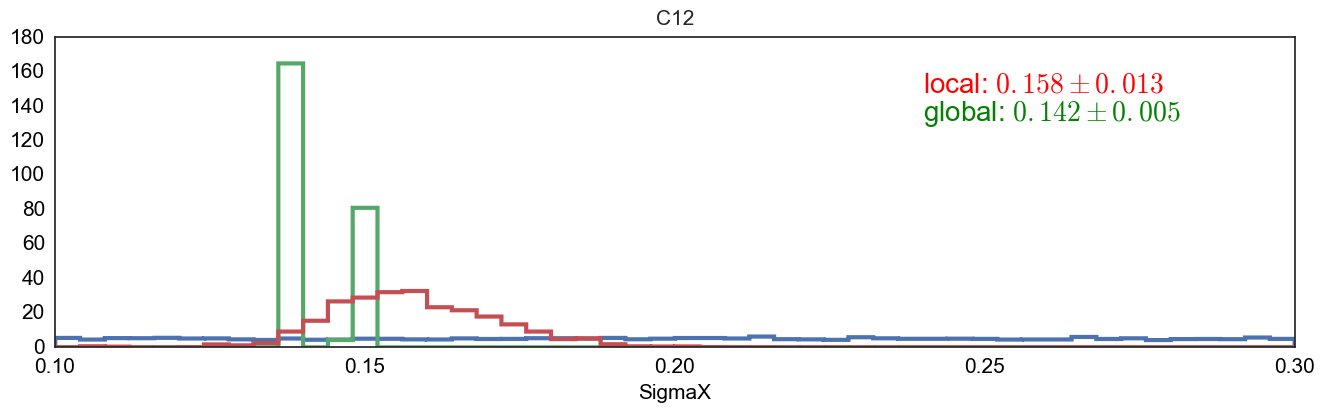

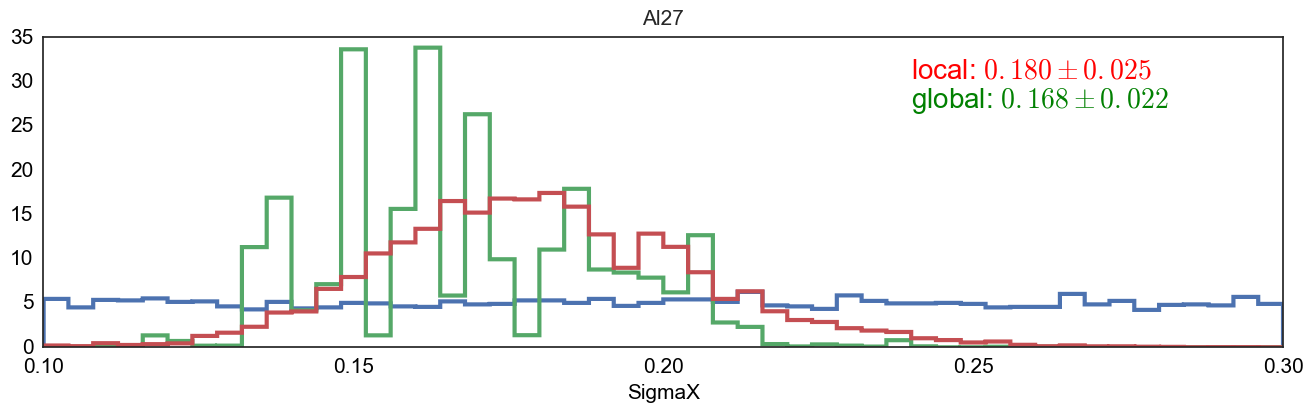

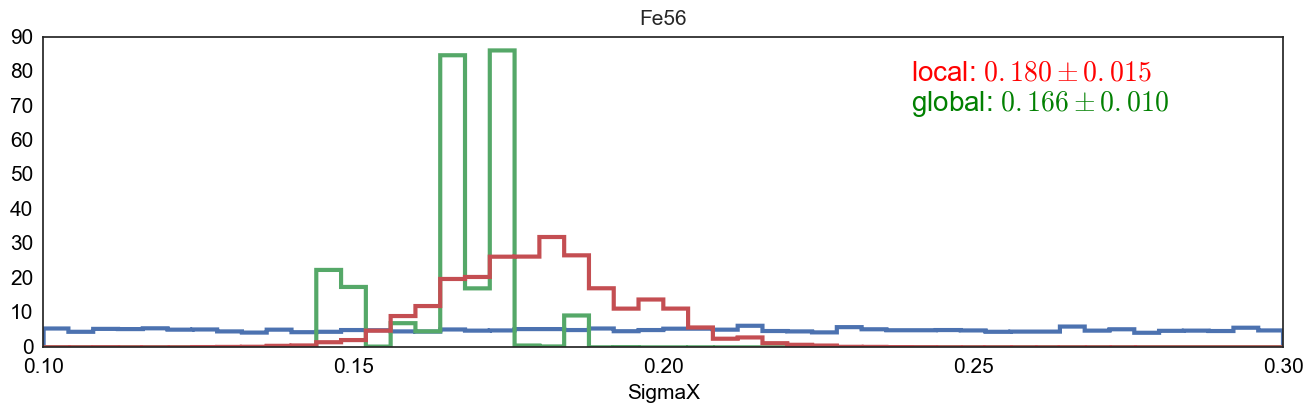

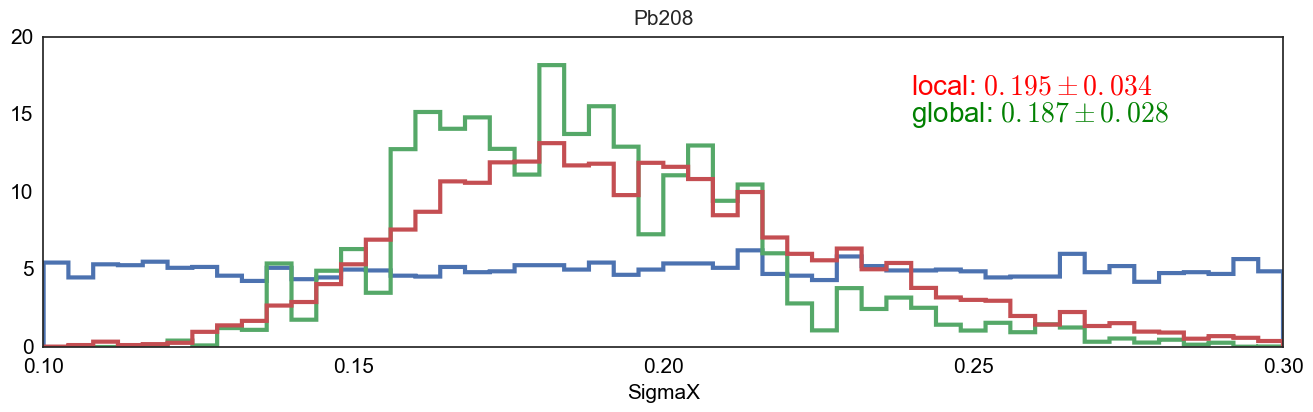

In [4]:
sample = sims[sims['gen_SigmaX']>0.0]
for target in ['C12','Al27','Fe56','Pb208']:
    fig,ax = plt.subplots(figsize=(16,4))
    parameter = 'SigmaX'
    # 'ks_PvalTotalTransverse_'+target # 'ks_PvalTotal_'+target
    x = sample['gen_'+parameter]

    weights = sample['ks_PvalTotal_'+target]
    h,bins,_=plt.hist(x,bins=50,normed=1,histtype='step',linewidth=3);
    if np.sum(weights)>0:
        h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1,histtype='step',linewidth=3);
        mu = np.average(x , weights=weights)
        sigma = np.sqrt(np.average((x-mu)**2, weights=weights))                                                                           
        plt.text(np.min(bins)+0.7*(np.max(bins)-np.min(bins)),0.8*np.max(h),'global: $%.3f\\pm%.3f$'%(mu,sigma),fontsize=20,color='green')
    weights = sample['ks_PvalTotalTransverse_'+target]
    if np.sum(weights)>0:
        plt.hist(x,weights=weights,bins=bins,normed=1,histtype='step',linewidth=3);
        mu = np.average(x , weights=weights)
        sigma = np.sqrt(np.average((x-mu)**2, weights=weights))                                                                           
        plt.text(np.min(bins)+0.7*(np.max(bins)-np.min(bins)),0.9*np.max(h),'local: $%.3f\\pm%.3f$'%(mu,sigma),fontsize=20,color='red')

    set_axes(ax,x_label=parameter,fontsize=15)
    ax.set_title(target,fontsize=15,y=1.02)
    

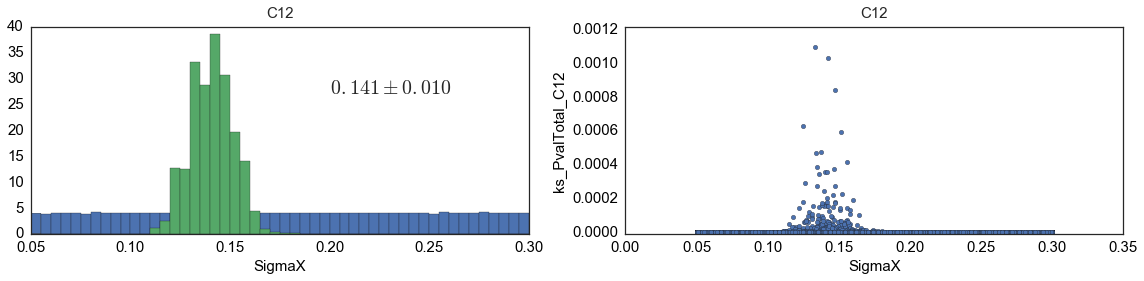

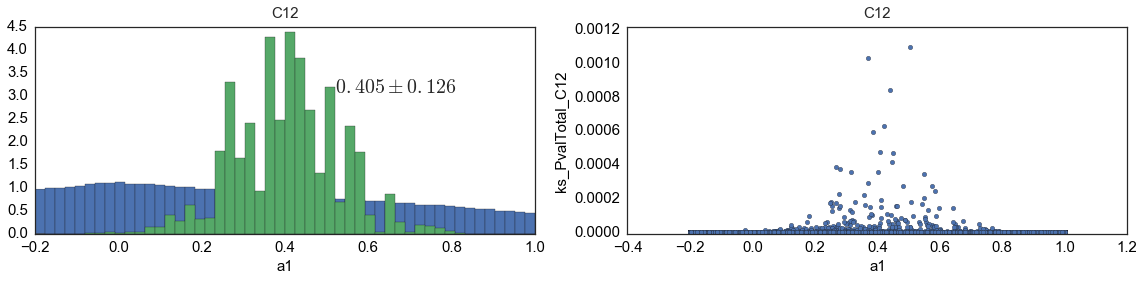

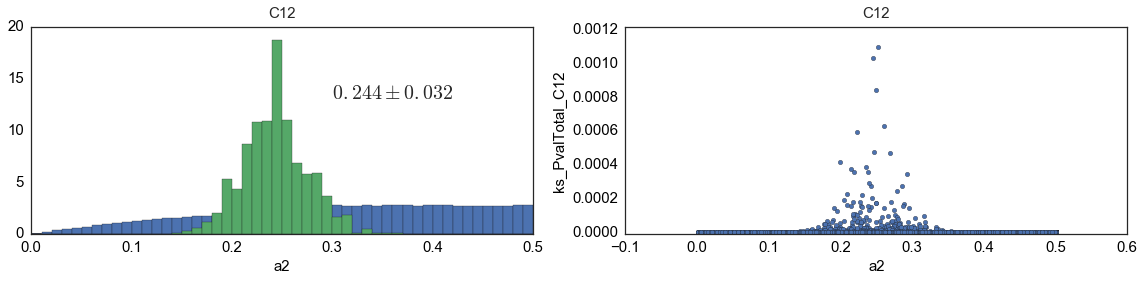

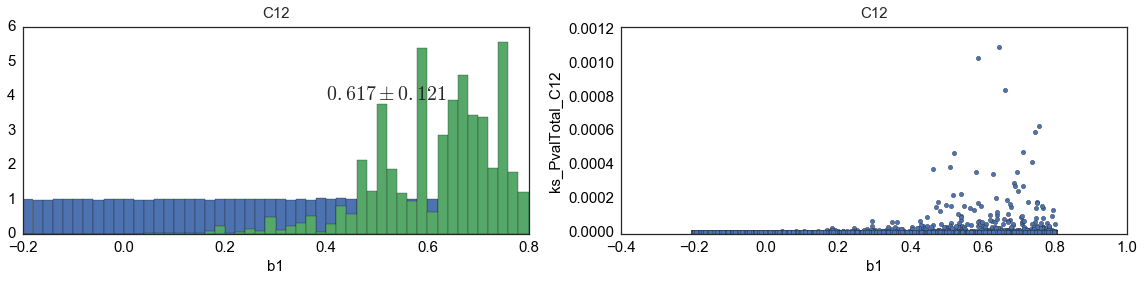

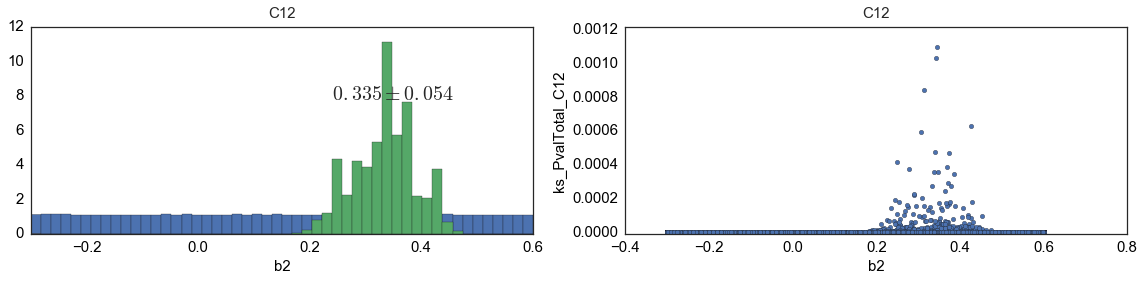

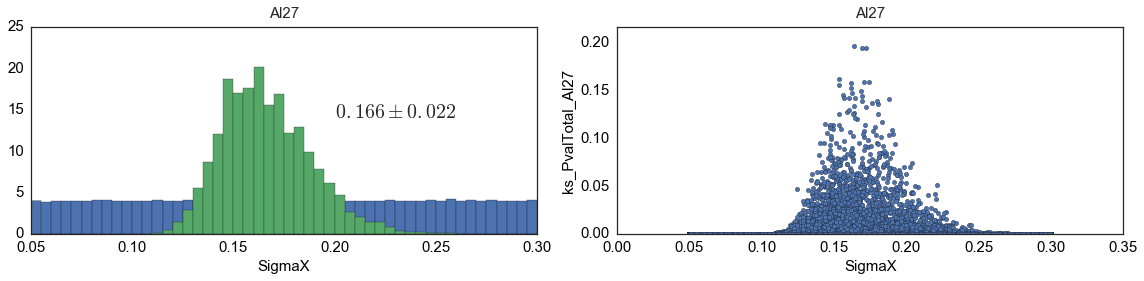

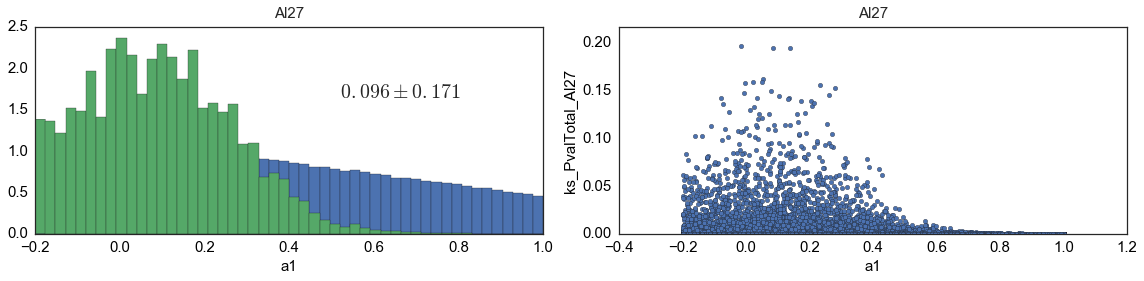

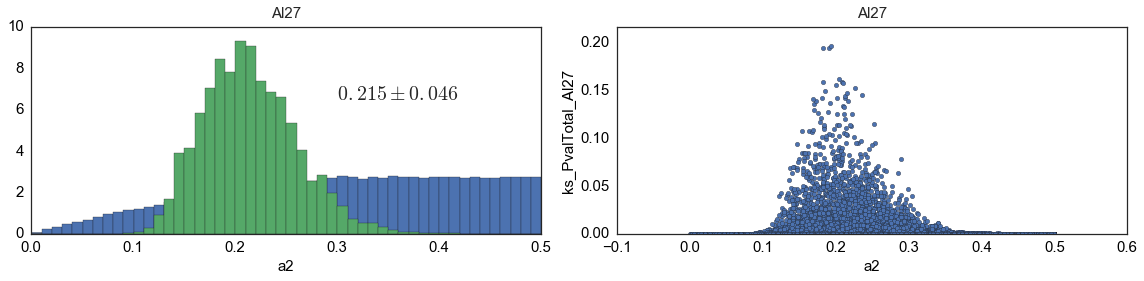

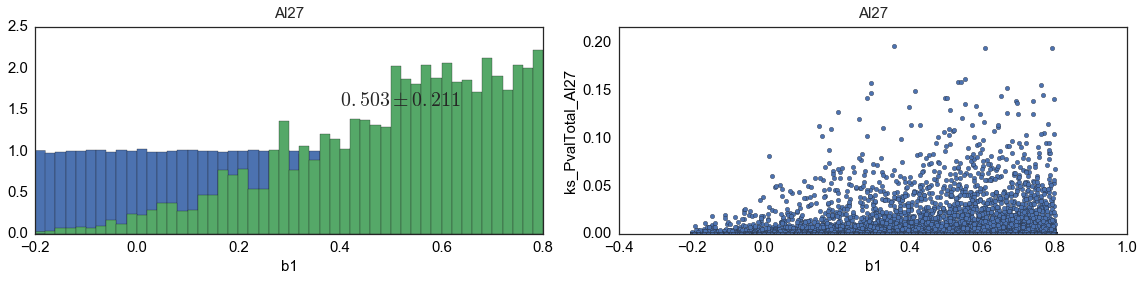

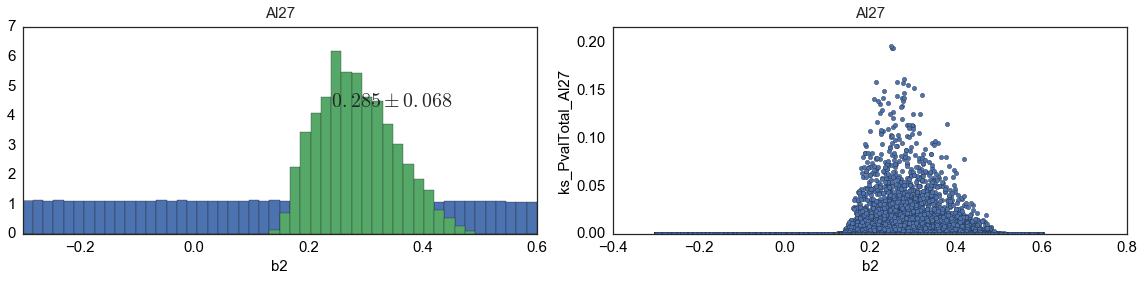

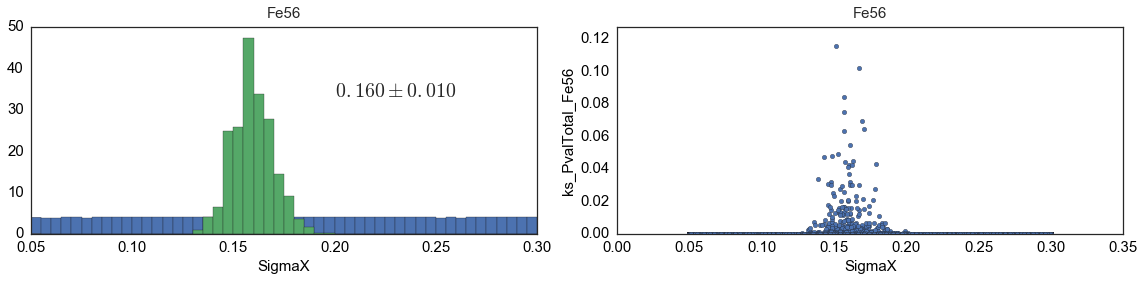

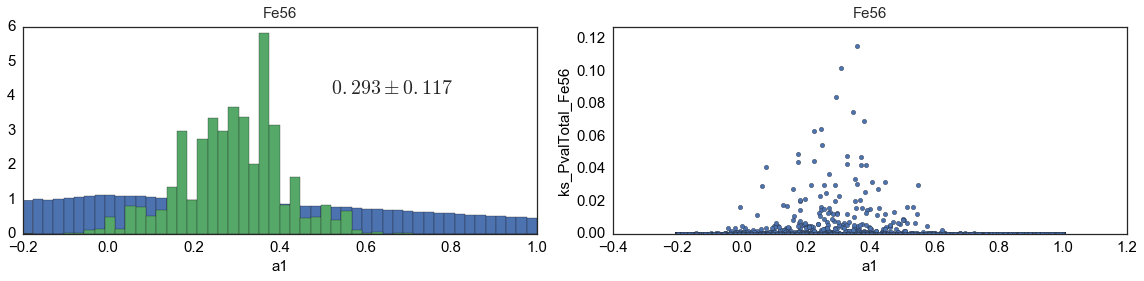

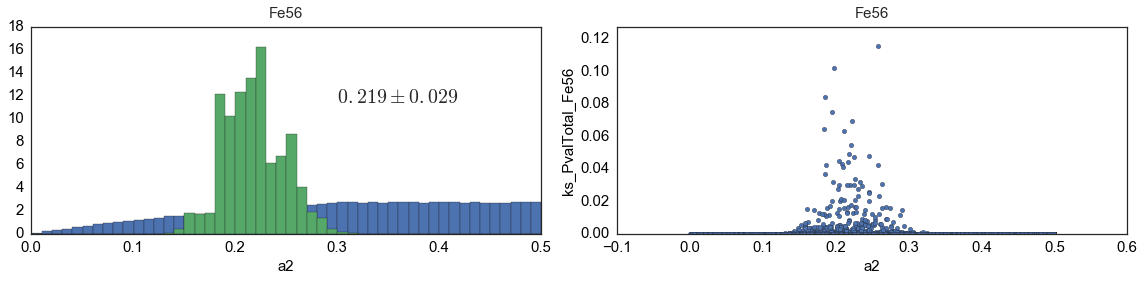

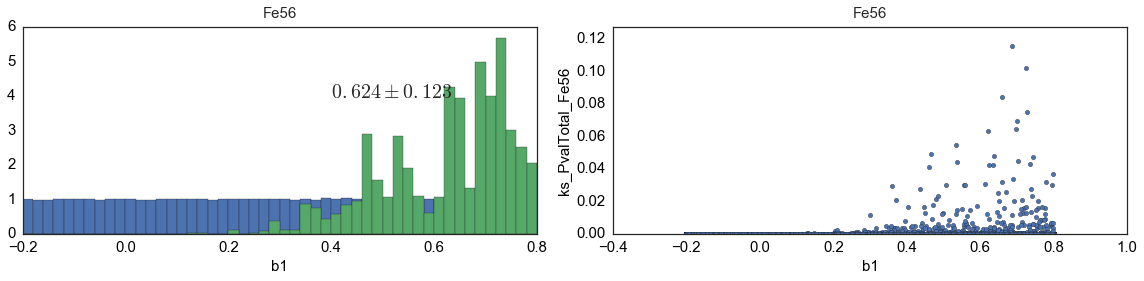

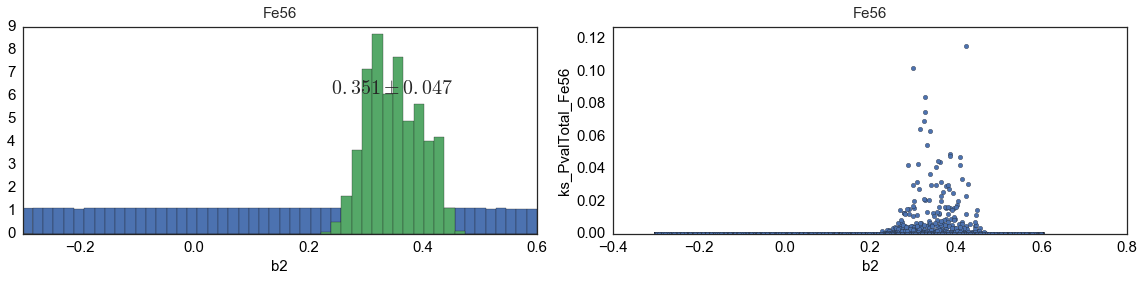

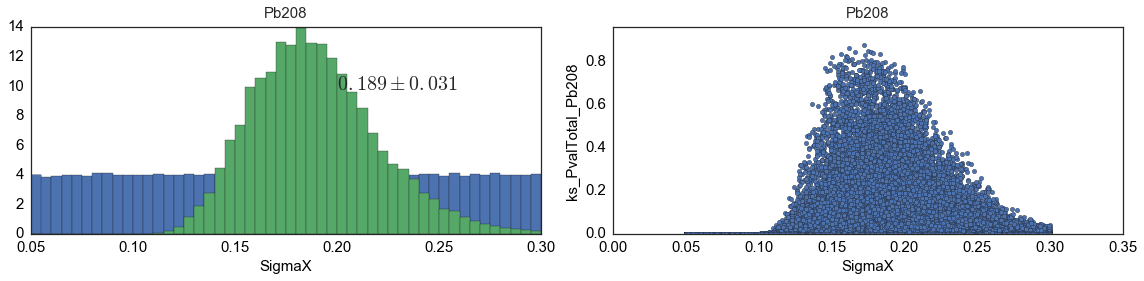

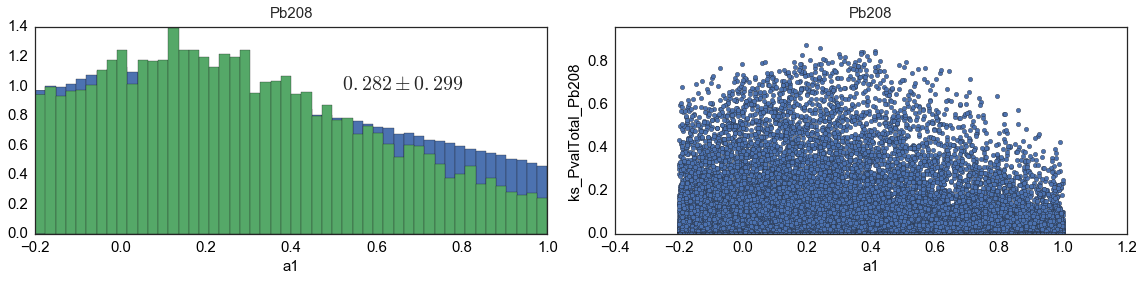

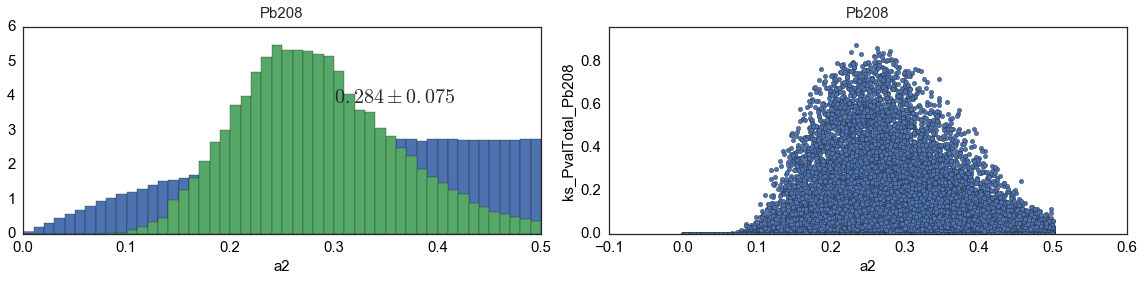

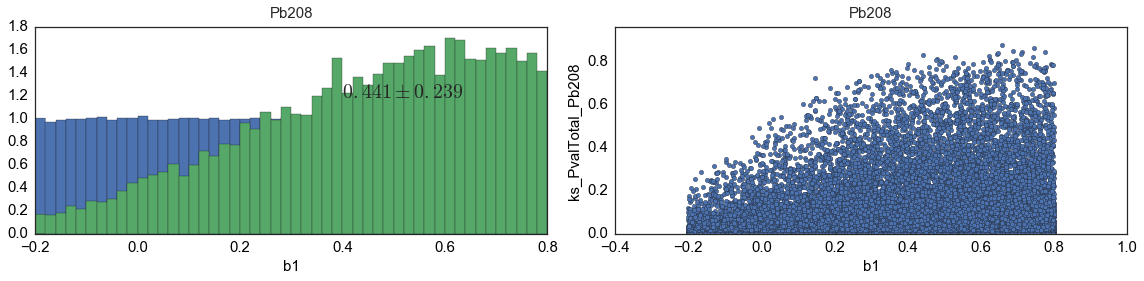

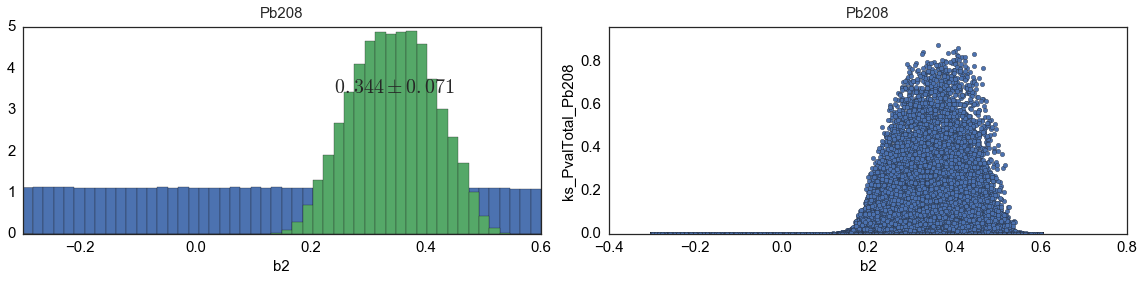

In [5]:
for target in ['C12','Al27','Fe56','Pb208']:
    for parameter in ['SigmaX','a1','a2','b1','b2']:
        var,w = parameter, 'ks_PvalTotal_'+target
        weights = sims[w]
        x = sims['gen_'+var]
        fig = plt.figure(figsize=(16,4))
        ax = fig.add_subplot(1,2,1)
        h,bins,_=plt.hist(x,bins=50,normed=1);
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1);            
            mu = np.average(sims['gen_'+var] , weights=weights)
            sigma = np.sqrt(np.average((sims['gen_'+var]-mu)**2, weights=weights))                                                                           
        set_axes(ax,x_label=var,fontsize=15)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.text(np.min(bins)+0.6*(np.max(bins)-np.min(bins)),0.7*np.max(h),'$%.3f\\pm%.3f$'%(mu,sigma),fontsize=20)
        ax = fig.add_subplot(1,2,2)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.scatter(x,weights);
        set_axes(ax,x_label=var,y_label=w,fontsize=15)
        ax.set_ylim(np.min(weights)-0.00001,1.1*np.max(weights)+0.00001)
        plt.tight_layout()

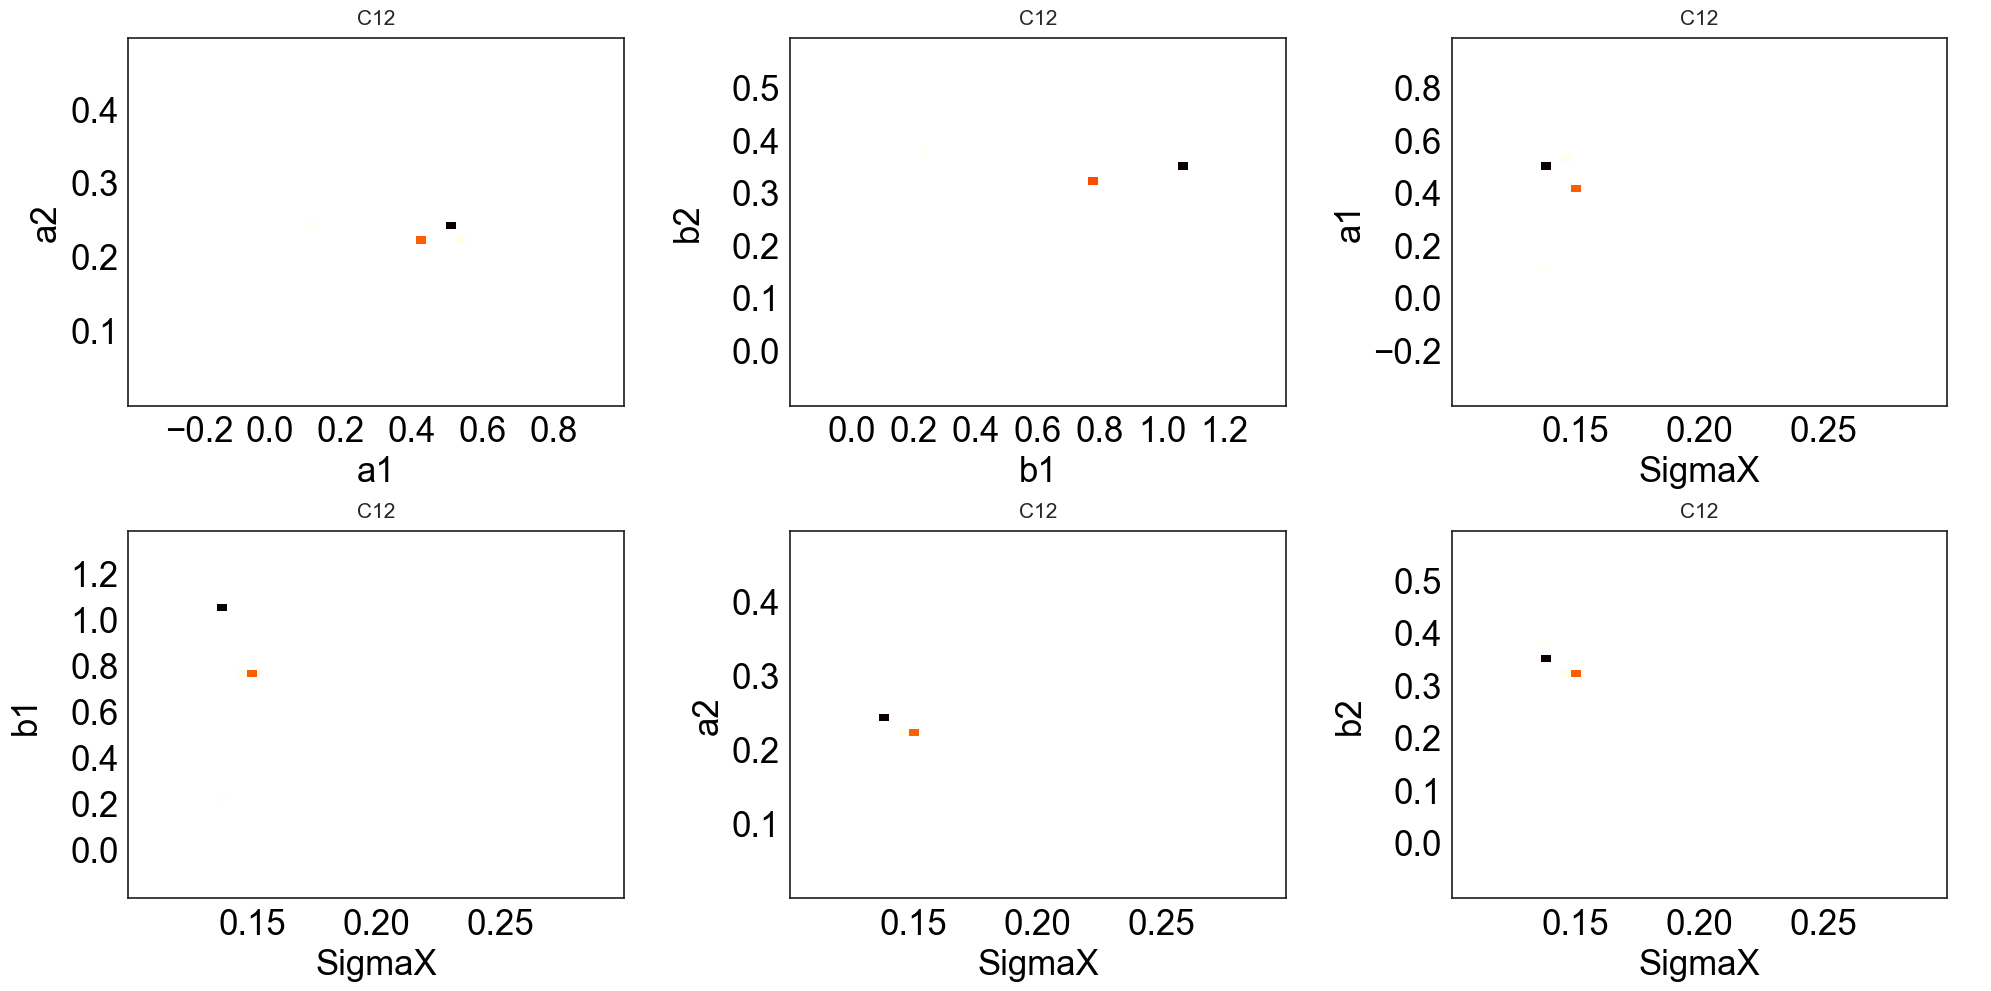

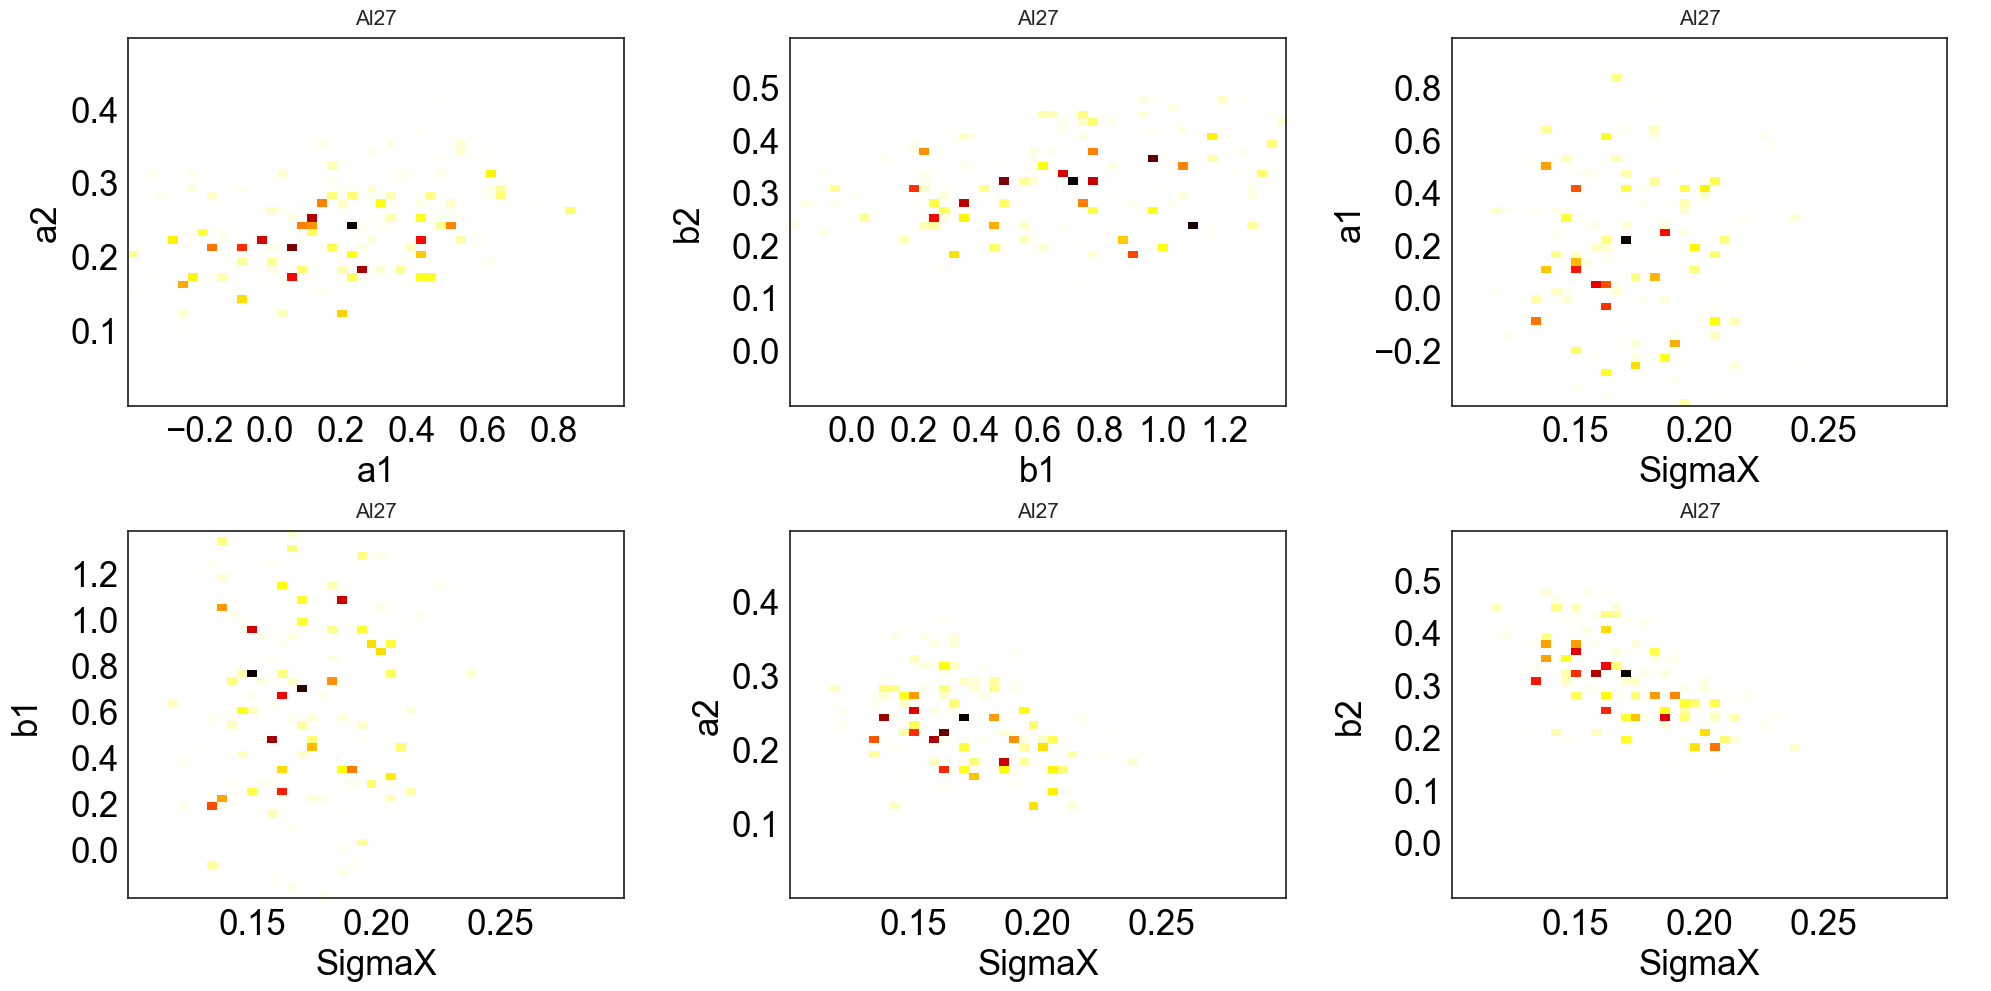

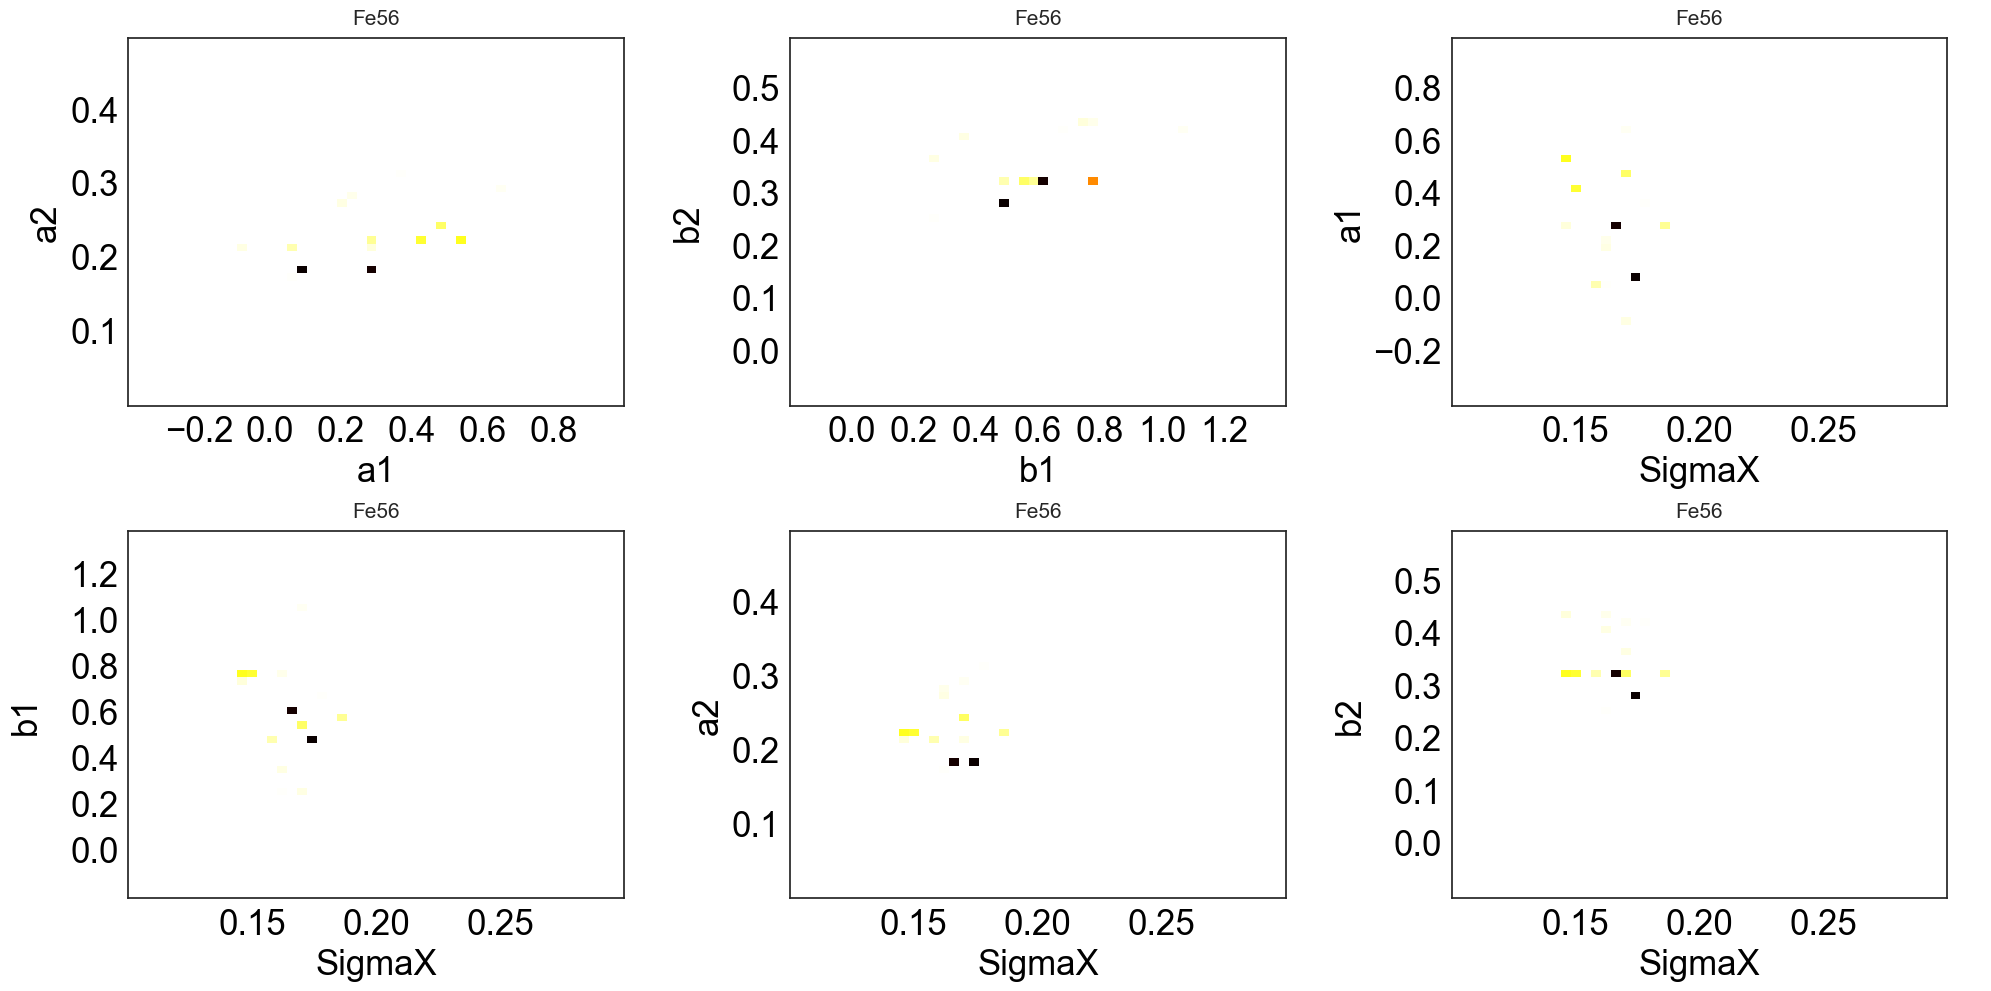

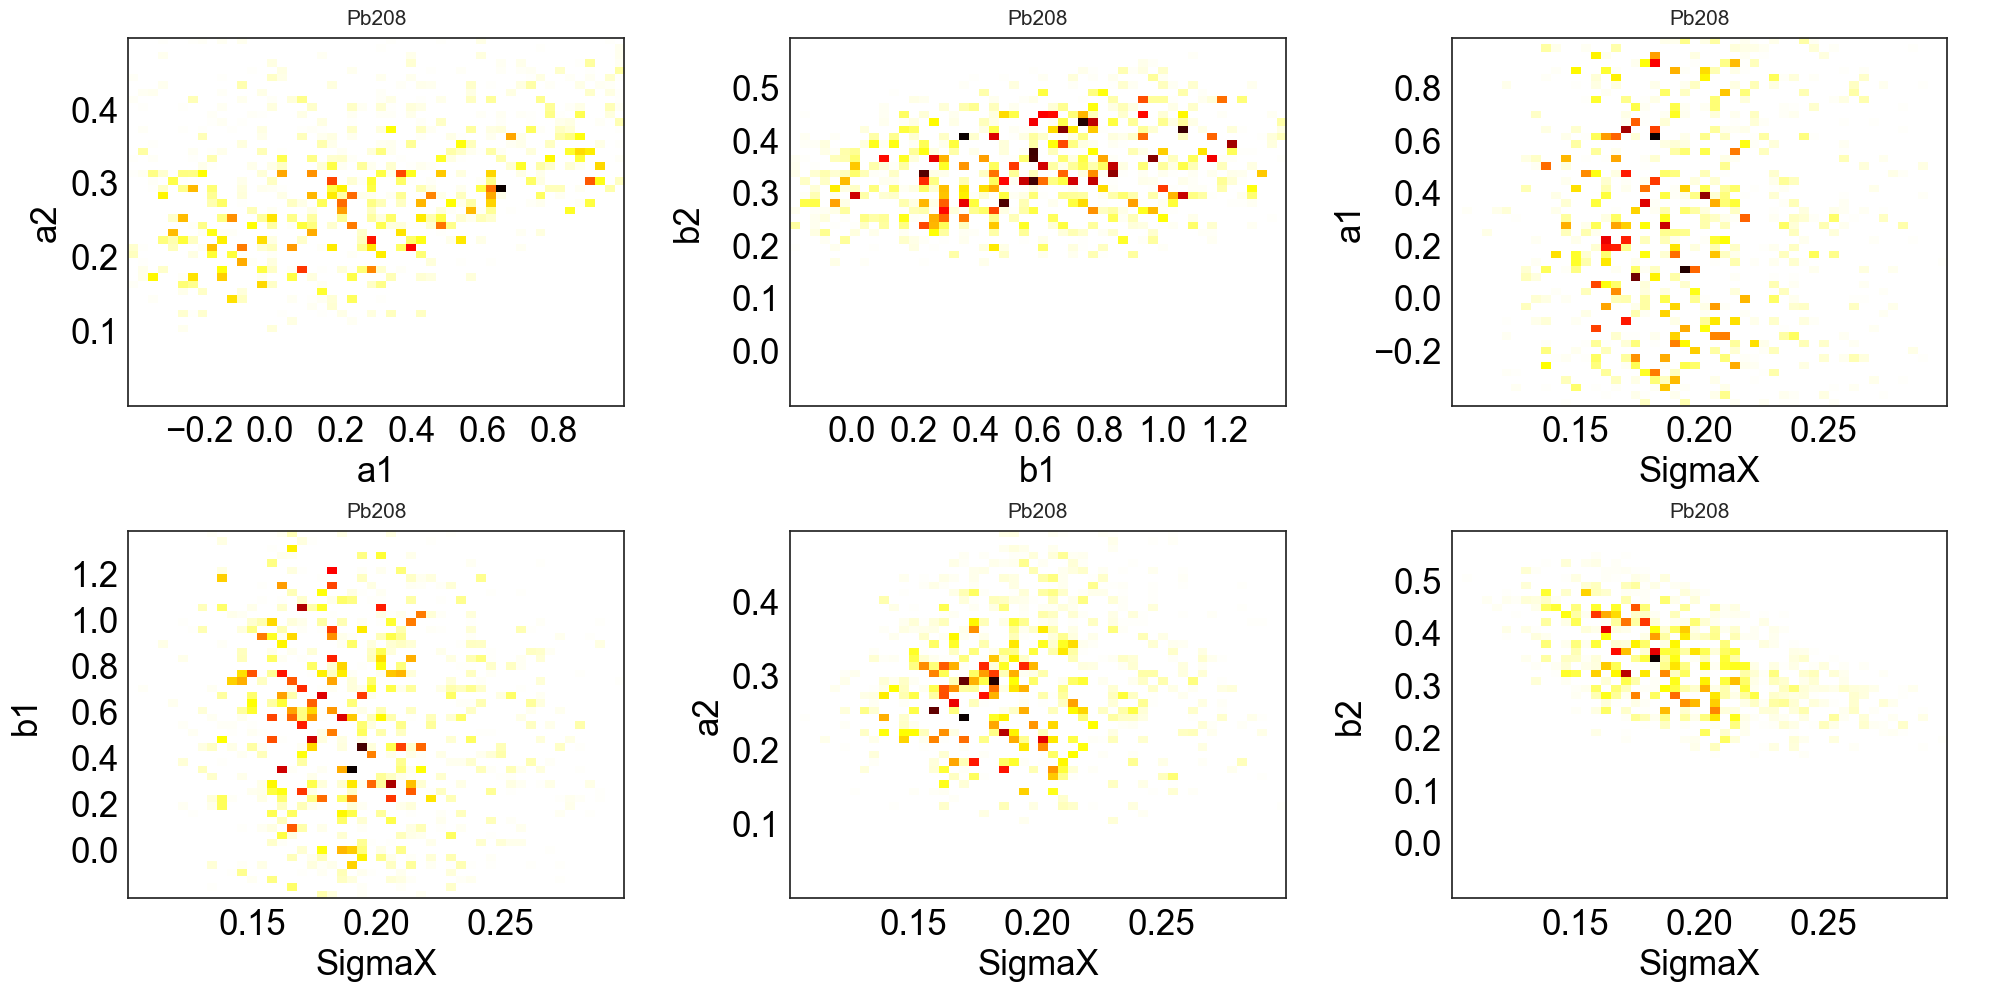

In [5]:
norm=''
for target in ['C12','Al27','Fe56','Pb208']:

    fig=plt.figure(figsize=(20,10))
    for i,parx,pary in zip(range(6),
                           ['a1','b1','SigmaX','SigmaX','SigmaX','SigmaX'],                         
                           ['a2','b2','a1','b1','a2','b2']):
        ax = fig.add_subplot(2,3,i+1)
        varx,vary,w = parx,pary, 'ks_PvalTotal_'+target
        plot_2d_hist(sample['gen_'+varx],sample['gen_'+vary],weights=sample[w],xlabel=parx,ylabel=pary,ax=ax,norm=norm)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.tight_layout()

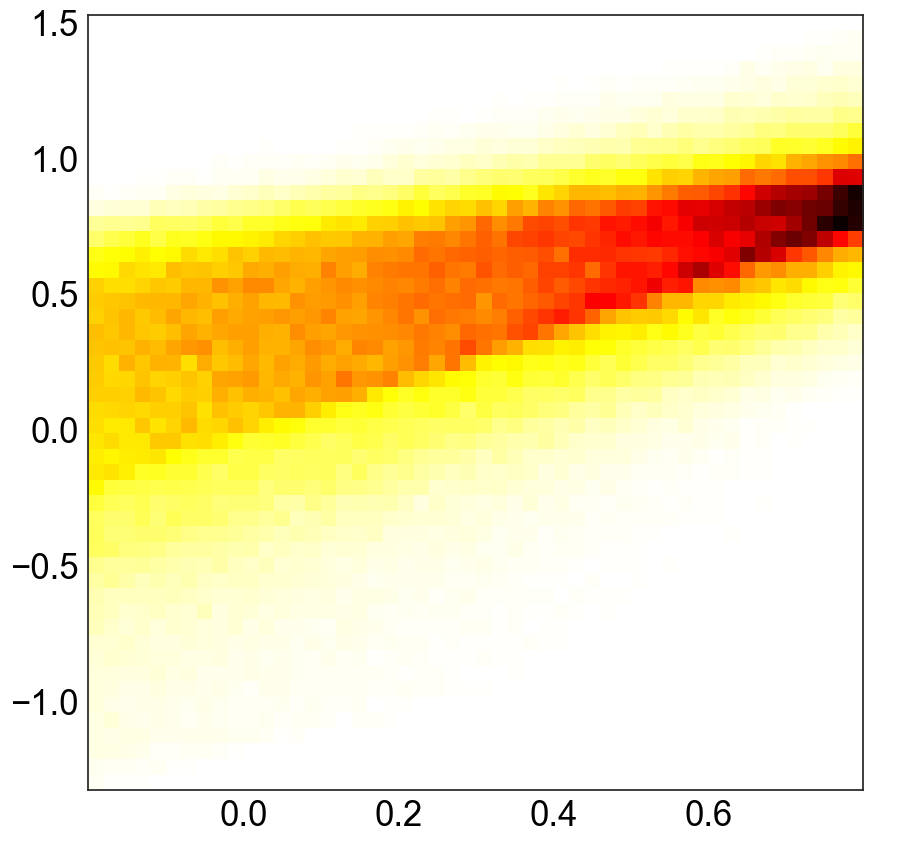

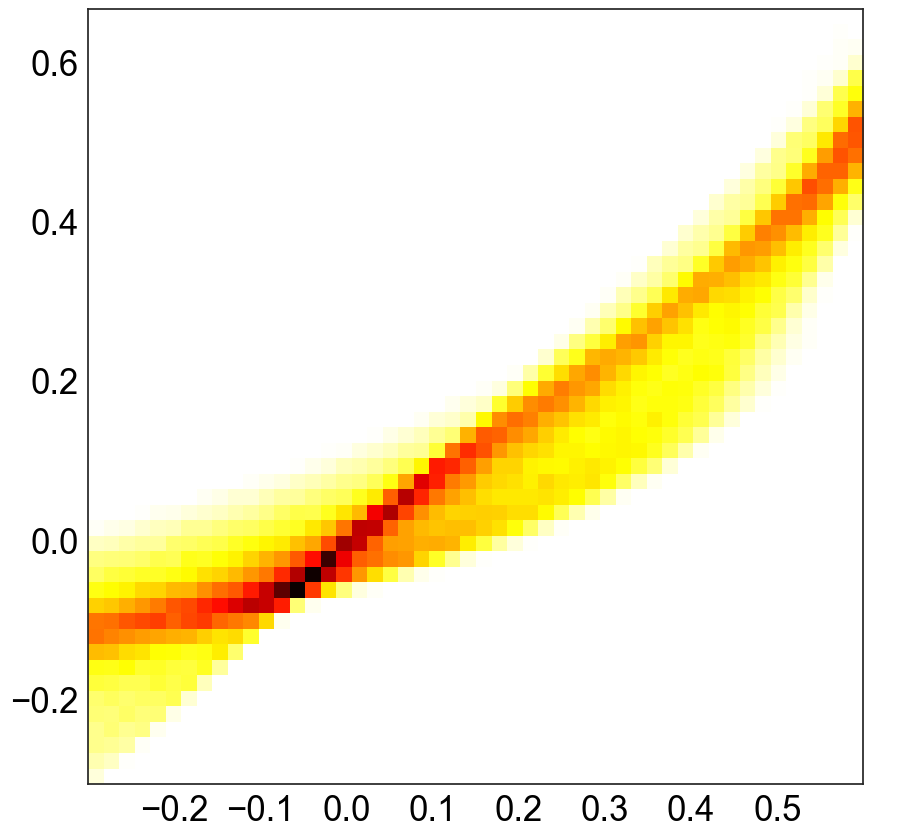

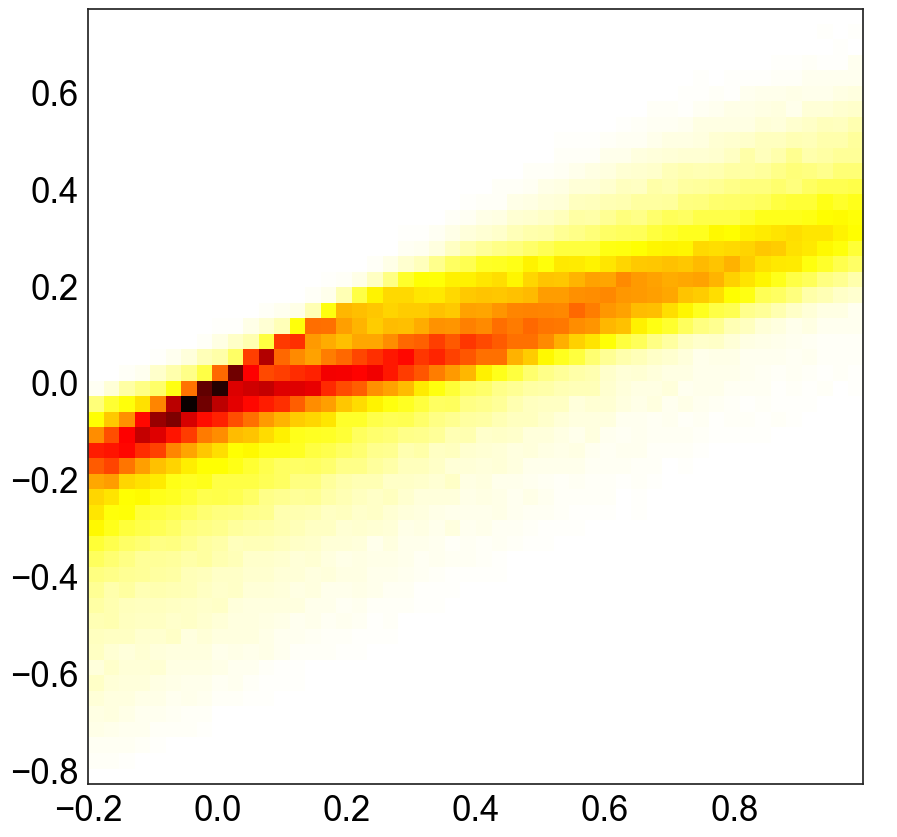

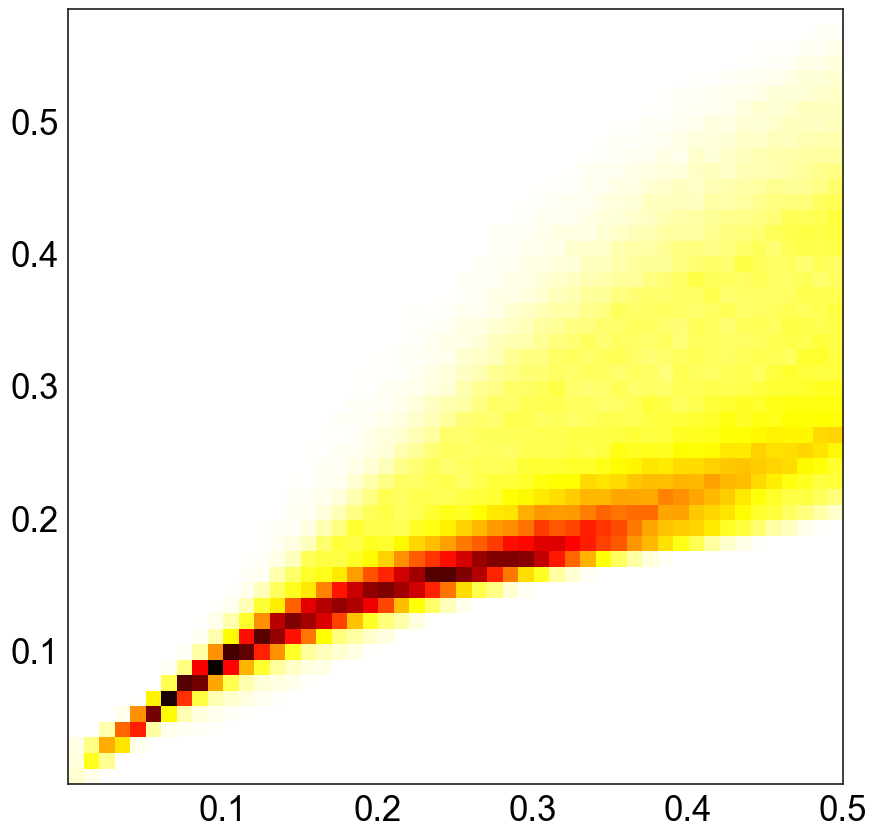

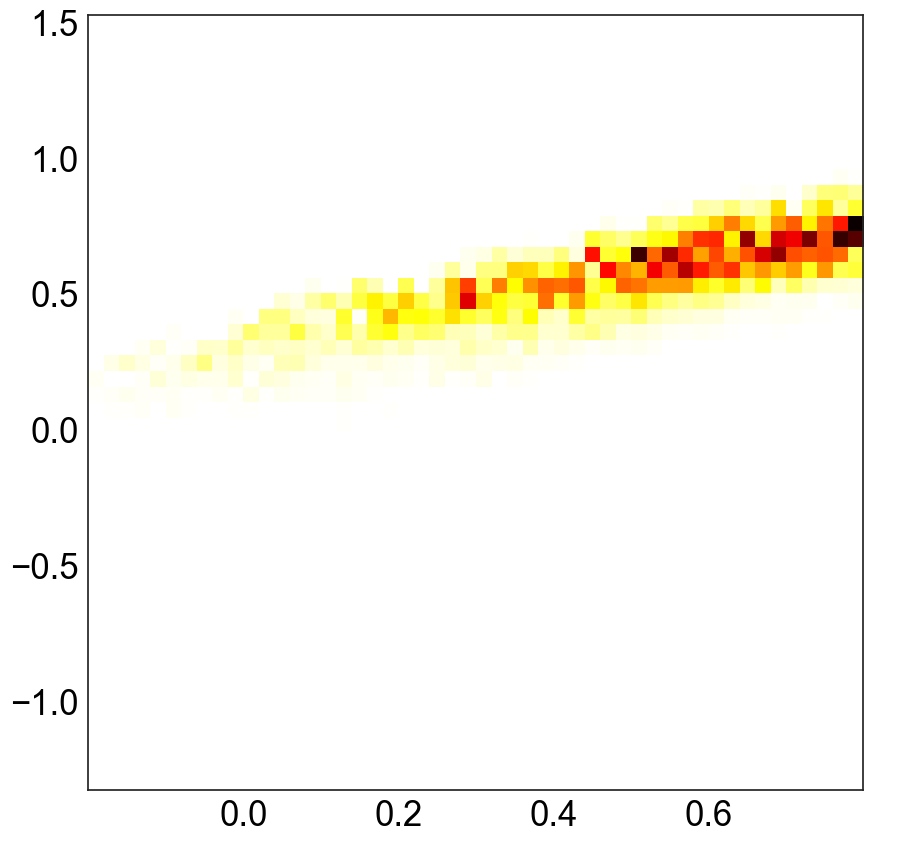

In [61]:
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1, norm='');
plot_2d_hist(sims[sims['rec_b2']>-100].gen_b2,sims[sims['rec_b2']>-100].rec_b2, norm='');
plot_2d_hist(sims[sims['rec_a1']>-100].gen_a1,sims[sims['rec_a1']>-100].rec_a1, norm='');
plot_2d_hist(sims[sims['rec_a2']>-100].gen_a2,sims[sims['rec_a2']>-100].rec_a2, norm='');
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1,weights=sims[sims['rec_b1']>-100].ks_PvalTotal_Al27, norm='');

[0.0, 0.99758600000000008]


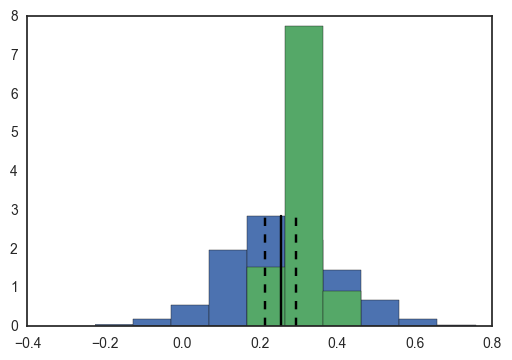

In [99]:
target,i_bin = 'Al27',4
# h,_,_=plt.hist(sims['recmean_z_pmiss_0.750_1.000'])
h,bins,_=plt.hist(sims['recmean_z_bin%d'%i_bin],normed=1)
plt.hist(sims['recmean_z_bin%d'%i_bin],weights=sims['ks_PvalTot_allPvals_'+target],bins=bins,normed=1)
# 12C mean of the distribution in this bin:
dataCMparameters = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/'+target+'_dataCMparameters.csv')
par, parErr = dataCMparameters.get_value(i_bin,'mean_z_unweighted'), dataCMparameters.get_value(i_bin,'mean_zErr_unweighted')
x = sims['ks_local_Pval_pcmZ_bin%d_%s'%(i_bin,target)]
print [np.min(x), np.max(x)]
plt.plot([par,par],[0,np.max(h)],color='black');
plt.plot([par+parErr,par+parErr],[0,np.max(h)],'--',color='black');
plt.plot([par-parErr,par-parErr],[0,np.max(h)],'--',color='black');